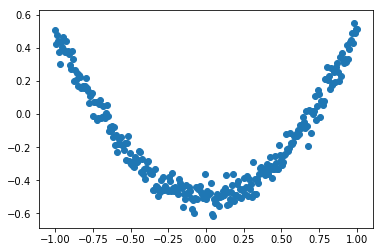

In [1]:
import matplotlib.pylab as plt

# 是《p26_建造神经网络》程序的例子
# 在《p27_结果可视化》添加了plt的图形输出
# 在《p29_Tensorboard可视化》中添加了tensorboard的基本图形定义

# tf.name_scope(name)            命名空间
# tf.summary.FileWriter('/tmp/tensorflow/mofan_logs/p29/', sess.graph) 显示在graph
# tf.summary.scalar(name,data)  显示在event，一般看loss 等训练过程值
# tf.summary.histogram(name,data)  显示在histogram，一般看W,b,outputs 等结果值

# 本次程序，添加tensorboard的训练过程，包括graph,histograms,events(误差值)
# 比如最终Summry写到目录“D:\tmp\tensorflow\mofan_logs\p29”，那在终端执行：
# C:\Users\wangbin>d:
# D:\>tensorboard --logdir=D:\tmp\tensorflow\mofan_logs\p30
# Starting TensorBoard b'47' at http://0.0.0.0:6006
# (Press CTRL+C to quit)
# 接着在浏览器中打开 网址：localhost:6006
# 注意log路径中不能有中文等。

import numpy as np
import tensorflow as tf

# 限制显卡内存
config = tf.ConfigProto(allow_soft_placement=True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)
config.gpu_options.allow_growth = True  # 开始不会给tensorflow全部gpu资源 而是按需增加
sess = tf.Session(config=config)

from p25_def添加层 import add_layer

# 设定输入数据
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]  # ，在最后一个维度后增加维度。
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# # 建立典型的三层神经网络:输入层-隐藏层-输出层

with tf.name_scope('inputs'):  # tensorboard 中命名框
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')  # 定义name=数据节点名称
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# @神经网络最关键的两步：
# 设置隐藏层，输入个数是由xs决定，个数是1，设定给10个神经元，其激励函数用relu
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu, layer_name='hidden_layer')
# 设置输出层，输入个数是由上一层l1决定，个数是10，输出结果只有一个，输出层不需要设定激励函数
predition = add_layer(l1, 10, 1, activation_function=None, layer_name='output_layer')

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - predition),
                                    reduction_indices=1))
    tf.summary.scalar('loss',loss) #p30添加，显示在event
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()


# 可视化过程：
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()




()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shape=(), dtype=string)
()
Tensor("Merge_3/MergeSummary:0", shap

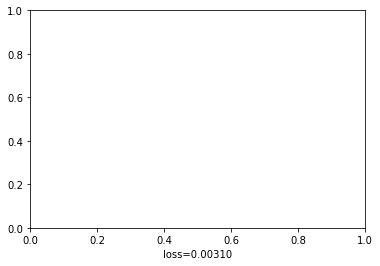

In [5]:
with tf.Session() as sess:
    merged=tf.summary.merge_all()  #p30添加，
    writer = tf.summary.FileWriter('/tmp/tensorflow/mofan_logs/p29/', sess.graph)
    sess.run(init)
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            loss_value = sess.run(loss, feed_dict={xs: x_data, ys: y_data})
            predition_value = sess.run(predition, feed_dict={xs: x_data})
            events=sess.run(merged, feed_dict={xs: x_data, ys: y_data})
            #run(merged)主要是将前面tf.summary.merge_all()的所有 tf.summary.scalar()对象，包括loss
            writer.add_summary(events,i)  # 将每次训练结果以及对应次数i传入图形，这个i就是event图形中的横坐标。
            print(loss_value.shape)
            print(merged)
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            plt.xlabel('loss=%.5f' % loss_value)
            lines = ax.plot(x_data, predition_value, 'r-', lw=5)
            plt.pause(0.1)